Cool stuff in this tutorial:

1) use iris package to understand netcdf

In [1]:
fname = '/Users/brodzik/cartopy-tutorial/resources/HadCRUT/fogg_mean_surface_temp.nc'

In [2]:
!ncdump -h $fname

netcdf fogg_mean_surface_temp {
dimensions:
	time = 3 ;
	latitude = 36 ;
	longitude = 72 ;
	bnds = 2 ;
variables:
	double mean_surface_temperature(time, latitude, longitude) ;
		mean_surface_temperature:_FillValue = 1.e+20 ;
		mean_surface_temperature:long_name = "Mean Surface Temperature" ;
		mean_surface_temperature:units = "K" ;
		mean_surface_temperature:cell_methods = "decade: month_number: mean" ;
		mean_surface_temperature:coordinates = "decade month_number" ;
	float time(time) ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	float time_bnds(time, bnds) ;
	float latitude(latitude) ;
		latitude:axis = "Y" ;
		latitude:units = "degrees_north" ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
	float longitude(longitude) ;
		longitude:axis = "X" ;
		longitude:units = "degrees_ea

In [3]:
import iris
cube = iris.load_cube(fname)

/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully filling 'time' dimension coordinate masked bound

In [4]:
cube

<iris 'Cube' of Mean Surface Temperature / (K) (time: 3; latitude: 36; longitude: 72)>

In [5]:
print(cube.coord('decade').points)

[1870 1870 1870]


In [6]:
print(cube.coord('month_number').points)

[10 11 12]


In [7]:
print(cube.coord('time'))

DimCoord([1875-04-17 00:00:00, 1875-05-17 12:00:00, 1875-06-17 00:00:00], bounds=[[1870-10-16 12:00:00, 1879-10-16 12:00:00],
       [1870-11-16 00:00:00, 1879-11-16 00:00:00],
       [1870-12-16 12:00:00, 1879-12-16 12:00:00]], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


In [11]:
%matplotlib notebook

import cartopy.crs as ccrs
import iris.plot as iplt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


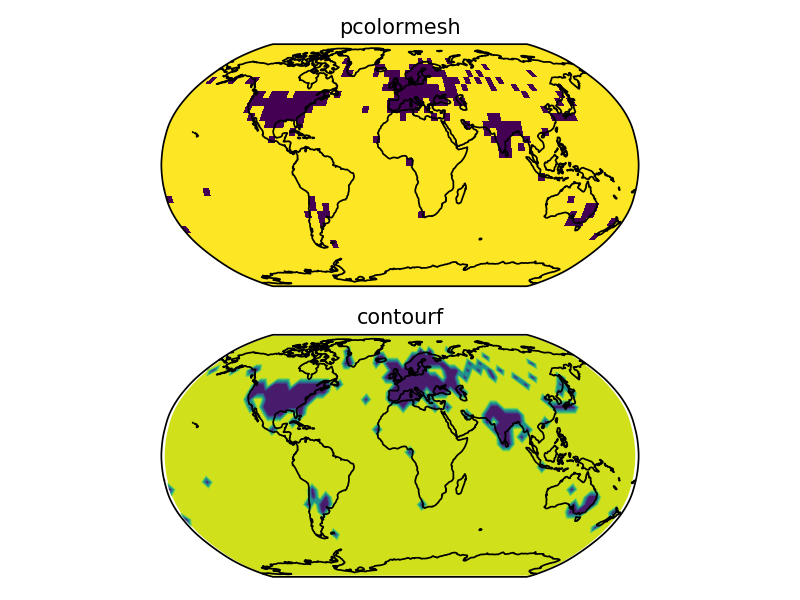

/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/brodzik/miniconda3/envs/cartopy/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [18]:
plt.figure()

october_cube = cube.extract(iris.Constraint(month_number=10))

ax1 = plt.subplot(211, projection=ccrs.Robinson())
iplt.pcolormesh(october_cube)
plt.title('pcolormesh')
ax1.coastlines()
ax1.set_global()

ax2 = plt.subplot(212, projection=ccrs.Robinson())
iplt.contourf(october_cube)
plt.title('contourf')
ax2.coastlines()
ax2.set_global()

plt.tight_layout()

plt.show()